# Twitter Sentiment Analysis

### Initializing the dependencies 

In [1]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, ConfusionMatrixDisplay # Performance Metrics  


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings  

warnings.filterwarnings('ignore')

### Data Cleaning and preprocessing

In [2]:
# Load the data
df = pd.read_csv("Tweets_train.csv")
df_val = pd.read_csv("Tweets_dev.csv")
df_test = pd.read_csv("Tweets_test1.csv")

In [3]:
# Check the head of the data
df.head()

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,positive
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive
3,569525116725567491,@USAirways The automated message isn't helpful...,negative
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive


In [4]:
# EDA
df.shape

(11858, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           11858 non-null  int64 
 1   text               11858 non-null  object
 2   airline_sentiment  11858 non-null  object
dtypes: int64(1), object(2)
memory usage: 278.0+ KB


In [6]:
# Check NAN value in the dataset
df.isnull().sum()

tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

In [7]:
df.describe()

,tweet_id
count,1.185800e+04
mean,5.692188e+17
std,7.804861e+14
min,5.675883e+17
25%,5.685585e+17
50%,5.694839e+17
75%,5.698913e+17
max,5.703106e+17


In [8]:

df.nunique()

tweet_id             11757
text                 11713
airline_sentiment        3
dtype: int64

In [9]:
df["airline_sentiment"].value_counts()

negative    7434
neutral     2510
positive    1914
Name: airline_sentiment, dtype: int64

In [10]:
df_tt = pd.concat([df, df_val])

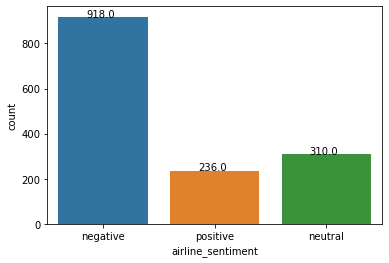

In [11]:
ax = sns.countplot(x=df_test["airline_sentiment"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.09))
plt.show()

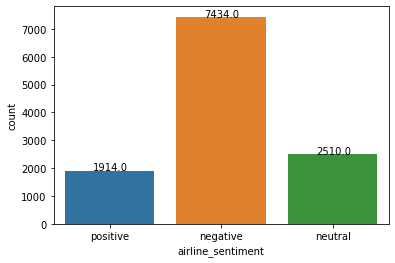

In [14]:
ax = sns.countplot(x=df["airline_sentiment"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.09))
plt.show()

Total number of sentiments of tweets :
negative    7434
neutral     2510
positive    1914
Name: airline_sentiment, dtype: int64


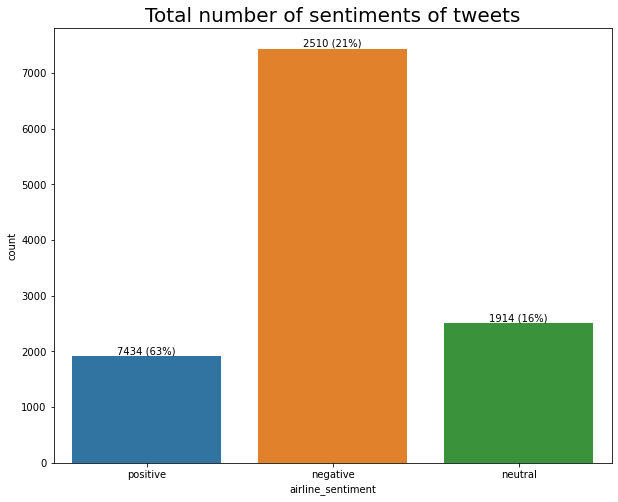

Total number of sentiments of tweets :
negative    826
neutral     279
positive    213
Name: airline_sentiment, dtype: int64


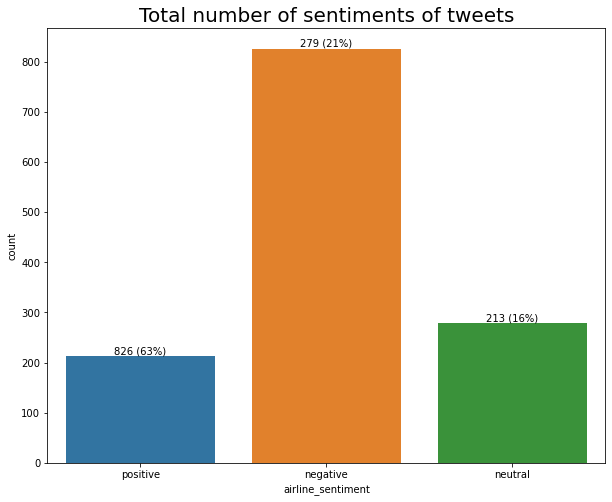

Total number of sentiments of tweets :
negative    918
neutral     310
positive    236
Name: airline_sentiment, dtype: int64


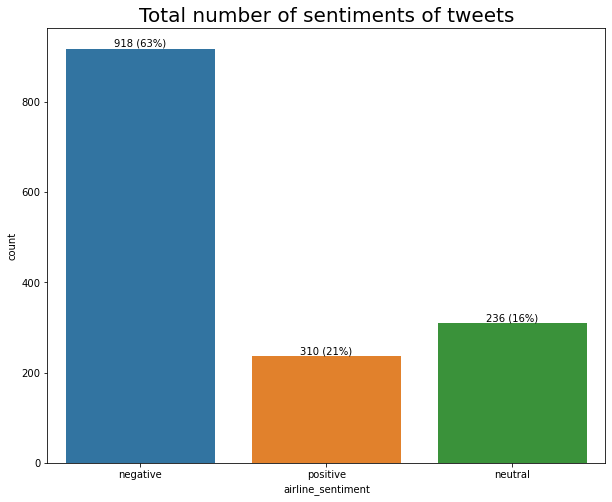

In [12]:
# Data Visualization
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df)
abs_values = df['airline_sentiment'].value_counts(ascending=False)
rel_values = df['airline_sentiment'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

cprint("Total number of sentiments of tweets :",'green')
print(df_val.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df_val)
abs_values = df_val['airline_sentiment'].value_counts(ascending=False)
rel_values = df_val['airline_sentiment'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

cprint("Total number of sentiments of tweets :",'green')
print(df_test.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df_test)
abs_values = df_test['airline_sentiment'].value_counts(ascending=False)
rel_values = df_test['airline_sentiment'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

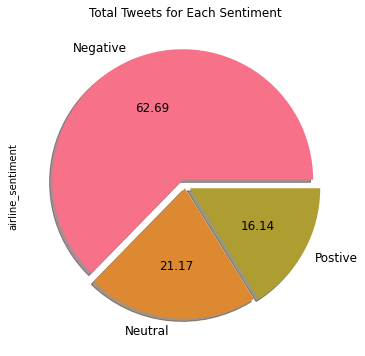

In [13]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(11767, 3)

In [16]:
# Split text of sentiments
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

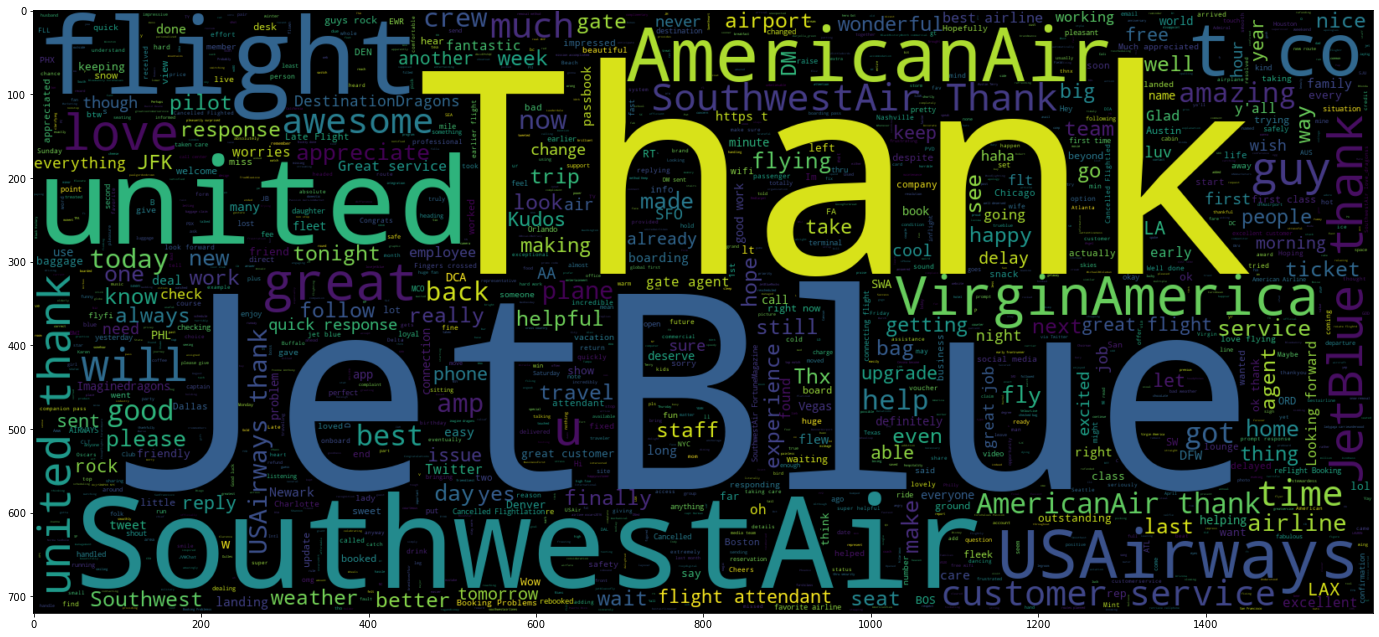

In [20]:
# World cloud for positive sentiments
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

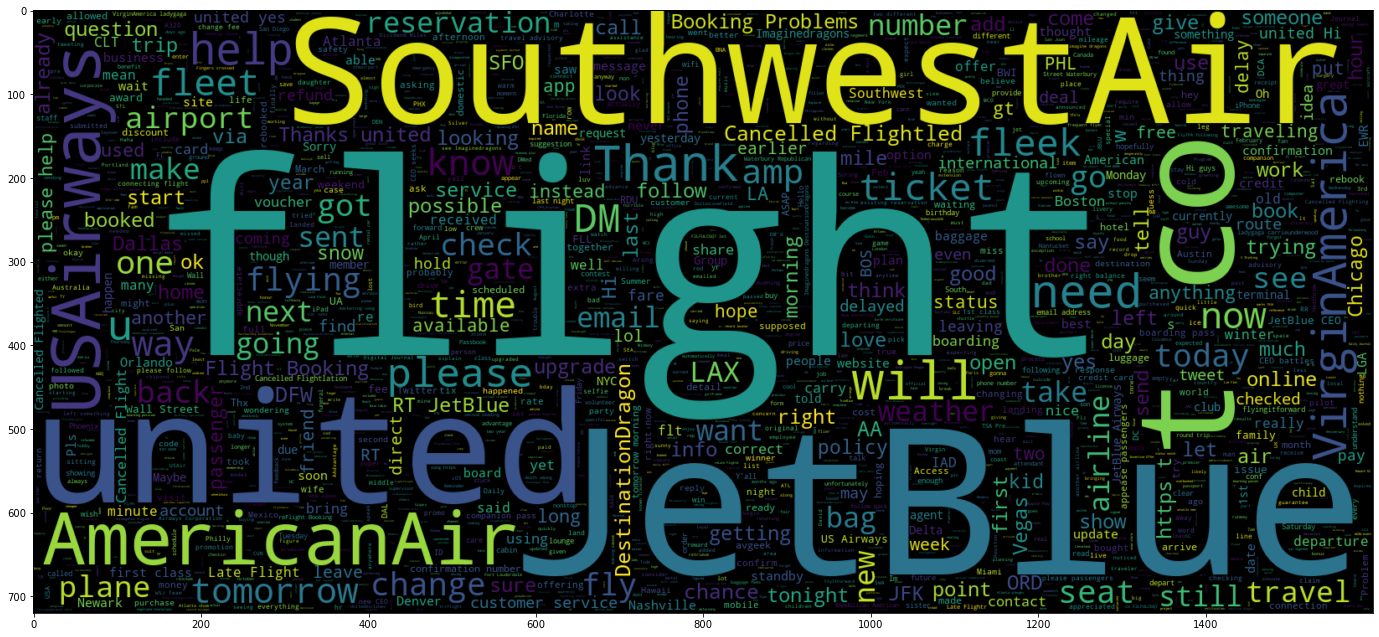

In [21]:
# World Cloud for neutarl sentiments
plt.figure(figsize=(24,12))
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')
ax.grid(False)

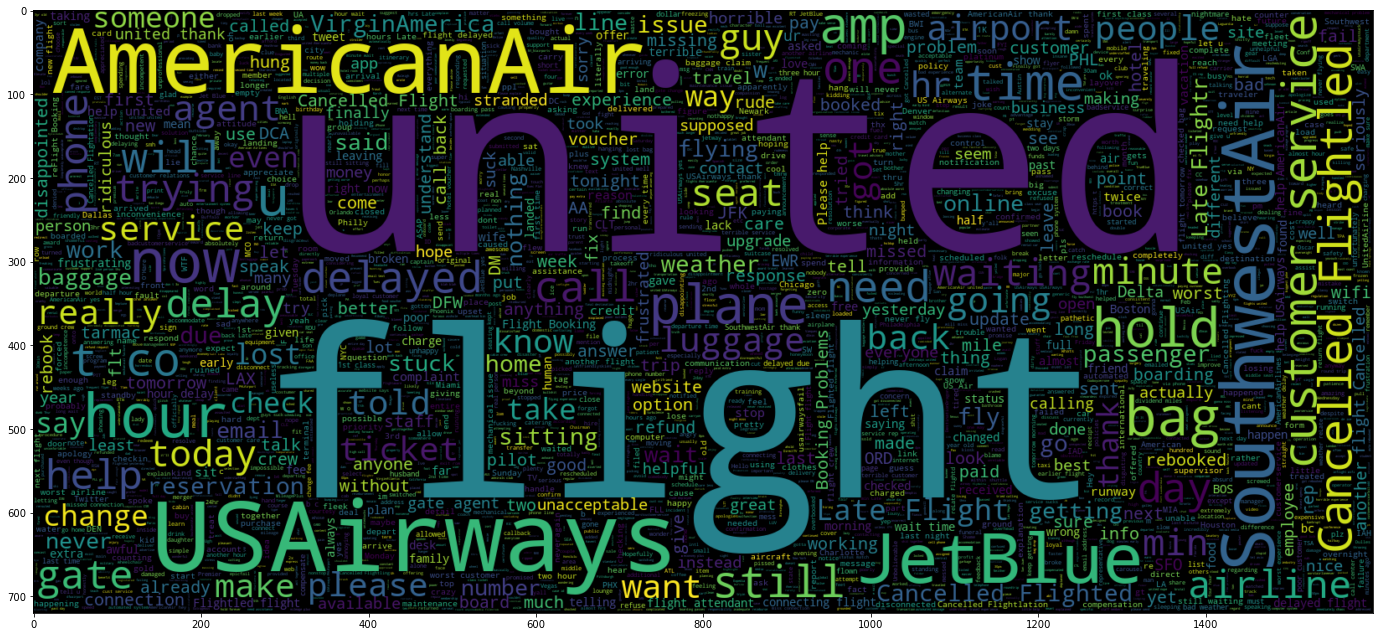

In [22]:
# World Cloud for Negative Sentiments
plt.figure(figsize = (24,12)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

In [17]:
# Text Preprocessing and Cleaning
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [18]:
# Apply convert_Sentiment function on training, validation and test set
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))
df_val.airline_sentiment = df_val.airline_sentiment.apply(lambda x : convert_Sentiment(x))
df_test.airline_sentiment = df_test.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [19]:
df.airline_sentiment

0        2
1        0
2        2
3        0
4        2
        ..
11853    0
11854    0
11855    0
11856    0
11857    0
Name: airline_sentiment, Length: 11767, dtype: int64

In [20]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combine negative reason with  tweet (if exsist)
df['final_text'] = df['text'] 
df_val['final_text'] = df_val['text'] 
df_test['final_text'] = df_test['text'] 

# Apply functions on tweets (train, valdiate and test)
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

df_val['final_text'] = df_val['final_text'].apply(lambda x : remove_username(x))
df_val['final_text'] = df_val['final_text'].apply(lambda x : remove_url(x))
df_val['final_text'] = df_val['final_text'].apply(lambda x : remove_emoji(x))
df_val['final_text'] = df_val['final_text'].apply(lambda x : decontraction(x))
df_val['final_text'] = df_val['final_text'].apply(lambda x : seperate_alphanumeric(x))
df_val['final_text'] = df_val['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df_val['final_text'] = df_val['final_text'].apply(lambda x : char(x))
df_val['final_text'] = df_val['final_text'].apply(lambda x : x.lower())
df_val['final_text'] = df_val['final_text'].apply(lambda x : remove_stopwords(x))

df_test['final_text'] = df_test['final_text'].apply(lambda x : remove_username(x))
df_test['final_text'] = df_test['final_text'].apply(lambda x : remove_url(x))
df_test['final_text'] = df_test['final_text'].apply(lambda x : remove_emoji(x))
df_test['final_text'] = df_test['final_text'].apply(lambda x : decontraction(x))
df_test['final_text'] = df_test['final_text'].apply(lambda x : seperate_alphanumeric(x))
df_test['final_text'] = df_test['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df_test['final_text'] = df_test['final_text'].apply(lambda x : char(x))
df_test['final_text'] = df_test['final_text'].apply(lambda x : x.lower())
df_test['final_text'] = df_test['final_text'].apply(lambda x : remove_stopwords(x))

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Himika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# result
df_final = pd.concat([df, df_val, df_test], ignore_index=True)

In [23]:
df_final

,tweet_id,text,airline_sentiment,final_text
0,5.691798e+17,@united you're good. Thank you!,2,good thank
1,5.698358e+17,"@AmericanAir way to ruin a vacation, my brothe...",0,way ruin vacation brother called night multipl...
2,5.685889e+17,@JetBlue yes thankfully! Catering just got her...,2,yes thankfully catering got loading frustrated...
3,5.695251e+17,@USAirways The automated message isn't helpful...,0,automated message helpful impossible speak hum...
4,5.688078e+17,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,2,makingloveoutofnothingatall brandloveaffair lax
...,...,...,...,...
14544,5.696780e+17,@AmericanAir I didn't miss my flight. America...,0,miss flight american airlines gave ticket well...
14545,5.698820e+17,@USAirways here's to sitting on hold for 4 hrs...,0,sitting hold hrs flight cancelled flighted dis...
14546,5.681920e+17,@SouthwestAir just had a great flight #4223 wi...,2,great flight damion best damionflight
14547,5.697750e+17,@AmericanAir Why did AA973 return to JFK? Tha...,1,aa return jfk thanks


In [25]:
X = df_final['final_text']
y = df_final['airline_sentiment']

In [26]:
# Tf-Idf on the cleaned texts
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [27]:
df_train = X_final[:11767,:10988]

In [28]:
df_val1 = X_final[11768:13085,:10988]
df_test1 = X_final[13086:,:10988]

In [29]:
y_train = y[:11767]
y_val1 = y[11768:13085]
y_test1 = y[13086:]

In [30]:
# Handling imbalanced using SMOTE
smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(df_train,y_train)
X_val_sm,y_val_sm = smote.fit_resample(df_val1,y_val1)
X_test_sm,y_test_sm = smote.fit_resample(df_test1,y_test1)

### Model Training and Evaluation

In [37]:
# define the multinomial Random Forest Classification model
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
# fitting the model
rf.fit(X_train_sm,y_train_sm)
# Accuracy Score
print(rf.score(X_train_sm,y_train_sm))

0.9890651122859337


In [38]:
# predictions
pred = rf.predict(X_val_sm)
print(confusion_matrix(y_val_sm, pred))
print(classification_report(y_val_sm, pred))

[[677  95  54]
 [259 459 108]
 [ 91 113 622]]
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       826
           1       0.69      0.56      0.61       826
           2       0.79      0.75      0.77       826

    accuracy                           0.71      2478
   macro avg       0.71      0.71      0.71      2478
weighted avg       0.71      0.71      0.71      2478



Random Forest


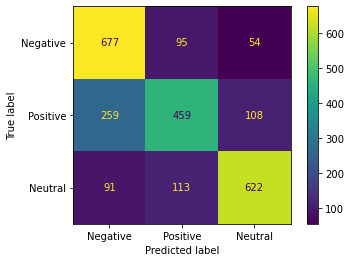

In [39]:
labels = ['Negative', 'Positive', 'Neutral']
print("Random Forest")
ConfusionMatrixDisplay(confusion_matrix(y_val_sm, pred), display_labels=labels).plot()

In [83]:
# define the multinomial XG Boost Classification model
xgb = XGBClassifier()
# fitting the model
xgb.fit(X_train_sm,y_train_sm)
# Accuracy Score
print(xgb.score(X_train_sm,y_train_sm))

0.8718539605078849


In [84]:
# predictions
pred = xgb.predict(X_val_sm)
print(confusion_matrix(y_val_sm, pred))
print(classification_report(y_val_sm, pred))

[[643 144  39]
 [127 590 109]
 [ 57  82 687]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       826
           1       0.72      0.71      0.72       826
           2       0.82      0.83      0.83       826

    accuracy                           0.77      2478
   macro avg       0.77      0.77      0.77      2478
weighted avg       0.77      0.77      0.77      2478



In [85]:
f1_score(y_val_sm, pred, average='micro')

0.774818401937046

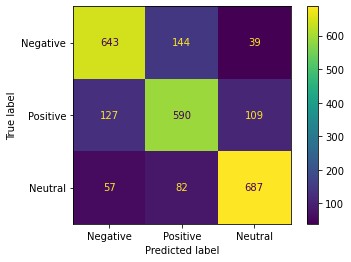

In [86]:
ConfusionMatrixDisplay(confusion_matrix(y_val_sm, pred), display_labels=labels).plot()

In [87]:
# define the multinomial Gradient Boosting Classifier model
gbc = GradientBoostingClassifier()
# fitting the model
gbc.fit(X_train_sm,y_train_sm)
# Accuracy Score
print(gbc.score(X_train_sm,y_train_sm))

0.7620984139894266


In [88]:
# predictions
pred = gbc.predict(X_val_sm)
print(confusion_matrix(y_val_sm, pred))
print(classification_report(y_val_sm, pred))

[[556 237  33]
 [131 603  92]
 [ 63 116 647]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.71       826
           1       0.63      0.73      0.68       826
           2       0.84      0.78      0.81       826

    accuracy                           0.73      2478
   macro avg       0.74      0.73      0.73      2478
weighted avg       0.74      0.73      0.73      2478



In [89]:
f1_score(y_val_sm, pred, average='micro')

0.7288135593220338

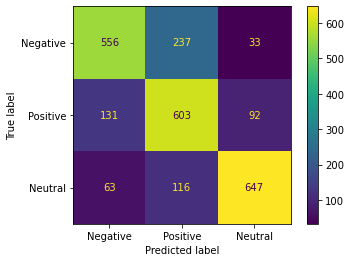

In [90]:
ConfusionMatrixDisplay(confusion_matrix(y_val_sm, pred), display_labels=labels).plot()

In [91]:
# define the Support Vector Classifier model
svc = SVC()
# fitting the model
svc.fit(X_train_sm,y_train_sm)
# Accuracy Score
print(svc.score(X_train_sm,y_train_sm))

0.9657042158058832


In [92]:
# predictions
pred = svc.predict(X_val_sm)
print(confusion_matrix(y_val_sm, pred))
print(classification_report(y_val_sm, pred))

[[792  22  12]
 [254 481  91]
 [108  61 657]]
              precision    recall  f1-score   support

           0       0.69      0.96      0.80       826
           1       0.85      0.58      0.69       826
           2       0.86      0.80      0.83       826

    accuracy                           0.78      2478
   macro avg       0.80      0.78      0.77      2478
weighted avg       0.80      0.78      0.77      2478



In [93]:
f1_score(y_val_sm, pred, average='micro')

0.7788539144471348

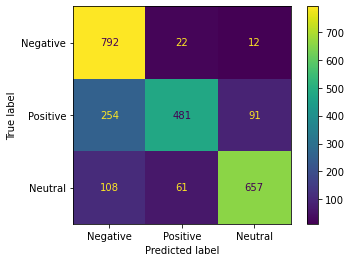

In [94]:
ConfusionMatrixDisplay(confusion_matrix(y_val_sm, pred), display_labels=labels).plot()

In [95]:
# define the multinomial Naive Bayes Classification model
nb = MultinomialNB()
# fitting the model
nb.fit(X_train_sm,y_train_sm)
# Accuracy Score
print(nb.score(X_train_sm,y_train_sm))

0.8690072748633139


In [96]:
# predictions
pred = nb.predict(X_val_sm)
print(confusion_matrix(y_val_sm, pred))
print(classification_report(y_val_sm, pred))

[[708  70  48]
 [245 462 119]
 [103  65 658]]
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       826
           1       0.77      0.56      0.65       826
           2       0.80      0.80      0.80       826

    accuracy                           0.74      2478
   macro avg       0.75      0.74      0.73      2478
weighted avg       0.75      0.74      0.73      2478



In [97]:
f1_score(y_val_sm, pred, average='micro')

0.7376916868442293

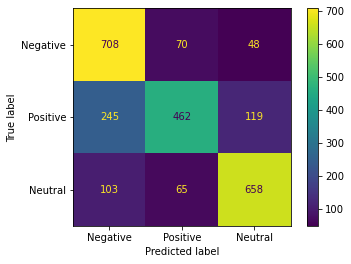

In [98]:
ConfusionMatrixDisplay(confusion_matrix(y_val_sm, pred), display_labels=labels).plot()

In [99]:
# define the multinomial Decision Tree Classification model
dtc = DecisionTreeClassifier()
# fitting the model
dtc.fit(X_train_sm,y_train_sm)
# Accuracy Score
print(dtc.score(X_train_sm,y_train_sm))

0.9951651529528716


In [100]:
from pandas.core.dtypes.cast import dict_compat
# predictions
pred = dtc.predict(X_val_sm)
print(confusion_matrix(y_val_sm, pred))
print(classification_report(y_val_sm, pred))

[[642 121  63]
 [290 381 155]
 [125  86 615]]
              precision    recall  f1-score   support

           0       0.61      0.78      0.68       826
           1       0.65      0.46      0.54       826
           2       0.74      0.74      0.74       826

    accuracy                           0.66      2478
   macro avg       0.66      0.66      0.65      2478
weighted avg       0.66      0.66      0.65      2478



In [101]:
f1_score(y_val_sm, pred, average='micro')

0.6610169491525424

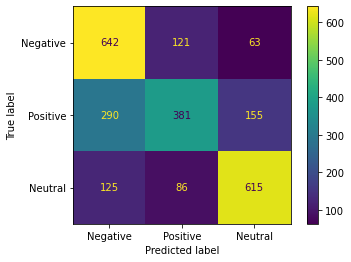

In [102]:
ConfusionMatrixDisplay(confusion_matrix(y_val_sm, pred), display_labels=labels).plot()

In [75]:
import lightgbm as ltb
# define the multinomial Decision Tree Classification model
lgb = ltb.LGBMClassifier()
# fitting the model
lgb.fit(X_train_sm,y_train_sm)
# Accuracy Score
print(lgb.score(X_train_sm,y_train_sm))

0.8670191134607564


In [76]:
# predictions
pred = lgb.predict(X_test_sm)
print(confusion_matrix(y_test_sm, pred))
print(classification_report(y_test_sm, pred))

[[718 151  48]
 [122 654 141]
 [ 55  98 764]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       917
           1       0.72      0.71      0.72       917
           2       0.80      0.83      0.82       917

    accuracy                           0.78      2751
   macro avg       0.78      0.78      0.78      2751
weighted avg       0.78      0.78      0.78      2751



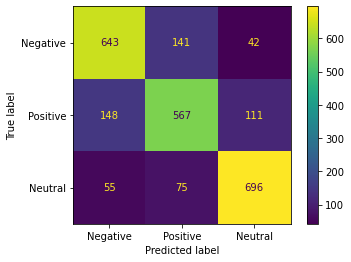

In [46]:
ConfusionMatrixDisplay(confusion_matrix(y_val_sm, pred), display_labels=labels).plot()

In [49]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Best and the Final Model
# Hyperparameter Tuning
lgbm_p = ltb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
gs = RandomizedSearchCV(
    estimator=lgbm_p, param_distributions=param_test, 
    n_iter=100,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)
# Fitting the model
gs.fit(X_train_sm,y_train_sm)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best score reached: nan with params: {'colsample_bytree': 0.9501241488957805, 'min_child_samples': 301, 'min_child_weight': 0.1, 'num_leaves': 28, 'reg_alpha': 0, 'reg_lambda': 100, 'subsample': 0.9326466073236168} 


In [72]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm as ltb

param_final ={'colsample_bytree': 0.96, 'min_child_weight': 0.1, 'num_leaves': 100, 'reg_alpha': 0, 'reg_lambda': 100, 'subsample': 0.93} 
lgbm_final = ltb.LGBMClassifier(**param_final)
# Fitting the model
lgbm_final.fit(X_train_sm,y_train_sm)
# Accuracy Score
print(lgbm_final.score(X_train_sm,y_train_sm))

0.8656635488681036


In [73]:
# predictions
pred = lgbm_final.predict(X_test_sm)
print(confusion_matrix(y_test_sm, pred))
print(classification_report(y_test_sm, pred))

[[730 135  52]
 [144 610 163]
 [ 69  78 770]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       917
           1       0.74      0.67      0.70       917
           2       0.78      0.84      0.81       917

    accuracy                           0.77      2751
   macro avg       0.77      0.77      0.77      2751
weighted avg       0.77      0.77      0.77      2751



In [78]:
# Final Model
import joblib
# save the model to disk
filename = 'Final_Model.h5'
joblib.dump(lgbm_final, filename)


['Final_Model.h5']

In [107]:
from sklearn.neighbors import KNeighborsClassifier
# define the multinomial Decision Tree Classification model
knn_clf = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     n_jobs=None, n_neighbors=3, weights='distance')
# fitting the model
knn_clf.fit(X_train_sm,y_train_sm)
# Accuracy Score
print(knn_clf.score(X_train_sm,y_train_sm))

0.9866250960191586


In [108]:
# predictions
pred = knn_clf.predict(X_val_sm)
print(confusion_matrix(y_val_sm, pred))
print(classification_report(y_val_sm, pred))

[[ 41 594 191]
 [ 22 649 155]
 [  1 279 546]]
              precision    recall  f1-score   support

           0       0.64      0.05      0.09       826
           1       0.43      0.79      0.55       826
           2       0.61      0.66      0.64       826

    accuracy                           0.50      2478
   macro avg       0.56      0.50      0.43      2478
weighted avg       0.56      0.50      0.43      2478



In [109]:
f1_score(y_val_sm, pred, average='micro')

0.49878934624697335

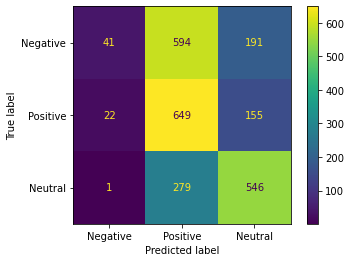

In [110]:
ConfusionMatrixDisplay(confusion_matrix(y_val_sm, pred), display_labels=labels).plot()

In [111]:
from sklearn.neural_network import MLPClassifier
# define the multilayer perceptron model
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,5),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
# fitting the model
mlp_clf.fit(X_train_sm,y_train_sm)
# Accuracy Score
print(mlp_clf.score(X_train_sm,y_train_sm))

0.9911888301477565


In [112]:
# predictions
pred = mlp_clf.predict(X_val_sm)
print(confusion_matrix(y_val_sm, pred))
print(classification_report(y_val_sm, pred))

[[619 147  60]
 [232 482 112]
 [135 145 546]]
              precision    recall  f1-score   support

           0       0.63      0.75      0.68       826
           1       0.62      0.58      0.60       826
           2       0.76      0.66      0.71       826

    accuracy                           0.66      2478
   macro avg       0.67      0.66      0.66      2478
weighted avg       0.67      0.66      0.66      2478



In [113]:
f1_score(y_val_sm, pred, average='micro')

0.6646489104116223

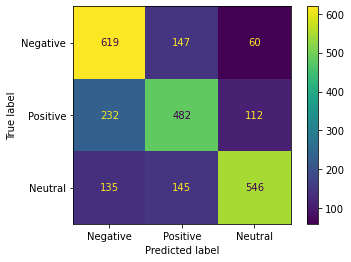

In [114]:
ConfusionMatrixDisplay(confusion_matrix(y_val_sm, pred), display_labels=labels).plot()

In [115]:
# Bi directional LSTM using NN

In [116]:
# Data Preprocessing
from nltk.stem.porter import *
def headline_to_words(headline):
    ''' Convert headline text into a sequence of words '''
    
    # convert to lowercase
    text = headline.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal headline ->", df['final_text'][0])
print("\nProcessed train headline ->", headline_to_words(df_final['final_text'][0]))


Original headline -> good thank

Processed train headline -> ['good', 'thank']


In [117]:
# Apply data processing to each headline
X = list(map(headline_to_words, df_final['final_text']))
X

[['good', 'thank'],
 ['way',
  'ruin',
  'vacat',
  'brother',
  'call',
  'night',
  'multipl',
  'place',
  'line',
  'get',
  'dead',
  'air',
  'call',
  'back'],
 ['ye', 'thank', 'cater', 'got', 'load', 'frustrat', 'suppos'],
 ['autom',
  'messag',
  'help',
  'imposs',
  'speak',
  'human',
  'right',
  'desper',
  'need',
  'luggag'],
 ['makingloveoutofnothingatal', 'brandloveaffair', 'lax'],
 ['download',
  'app',
  'iphon',
  'notic',
  'drink',
  'coupon',
  'noth',
  'display',
  'get',
  'readi',
  'fli'],
 ['post',
  'link',
  'articl',
  'verifi',
  'initi',
  'complaint',
  'comment',
  'say',
  'thing'],
 ['sure', 'anyth', 'help', 'would', 'great'],
 ['baggag',
  'lost',
  'flight',
  'cancel',
  'flightl',
  'get',
  'accommod',
  'even',
  'anoth',
  'airlin',
  'least',
  'one',
  'free',
  'hotel'],
 ['charlott',
  'staff',
  'need',
  'prayer',
  'disappoint',
  'respons',
  'mishap',
  'lott',
  'piss',
  'peopl'],
 ['suggest',
  'failur',
  'make',
  'huge',
  'd

In [118]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df_final['airline_sentiment'])

In [119]:
print(X[0])
print(Y[0])

['good', 'thank']
2


In [120]:
len(X)


14549

In [121]:
X_train_dl = X[:11767]
X_val_dl = X[11768:13085]
X_test_dl = X[13086:]
Y_train_dl = Y[:11767]
Y_val_dl = Y[11768:13085]
Y_test_dl = Y[13086:]

In [122]:
# Bag of words (BOW) feature extraction
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# headline have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train_dl = count_vector.fit_transform(X_train_dl).toarray()

# Transform testing data
X_val_dl = count_vector.transform(X_val_dl).toarray()

In [123]:
import sklearn.preprocessing as pr

#Normalize BoW features in training and test set
X_train_dl = pr.normalize(X_train_dl, axis=1)
X_val_dl  = pr.normalize(X_val_dl, axis=1)

In [124]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['aa', 'aadavantag', 'aadelay', 'aadv', 'aadvantag', 'aafail', 'aand', 'aaron', 'aateam', 'ab', 'aback', 'abandon', 'abassinet', 'abc', 'abcnew', 'abduct', 'abi', 'abil', 'abl', 'aboard', 'aboout', 'abq', 'abroad', 'absolut', 'absorb', 'absurd', 'absurdli', 'abt', 'abund', 'abus', 'abysm', 'ac', 'acarl', 'acc', 'acceler', 'accept', 'access', 'accid', 'accident', 'accomid', 'accommod', 'accompani', 'accomplish', 'accord', 'accordingli', 'account', 'accru', 'acct', 'accumul', 'accur', 'accuratetraveltim', 'accus', 'achiev', 'aci', 'ack', 'acknowledg', 'acosta', 'acoust', 'acquir', 'acquisit', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'ada', 'adam', 'adapt', 'add', 'addit', 'additon', 'addr', 'address', 'addtl', 'adjac', 'adjust', 'admin', 'admir', 'admit', 'adolfo', 'adopt', 'ador', 'adress', 'adult', 'adv', 'advanc', 'advantag', 'adventur', 'advertis', 'advi', 'advic', 'advis', 'advisori', 'advsri', 'aerojobmarket', 'aeroport', 'aesthet', 'aex', 'affect', 'affili', 'afford', '

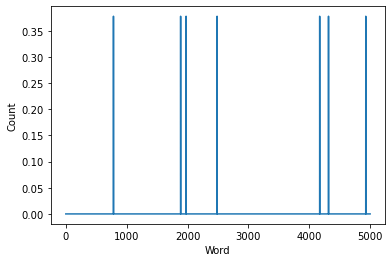

In [125]:
# Plot the BoW feature vector
plt.plot(X_train_dl[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()


In [126]:
# Tokenizing and Padding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

max_words = 5000
max_len= 60

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_final['final_text'][0])
X, tokenizer = tokenize_pad_sequences(df_final['final_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 good thank
After Tokenization & Padding 
 [59 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]


In [127]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [128]:
X_train_dl = X[:11767]
X_val_dl = X[11768:13085]
X_test_dl = X[13086:]
Y_train_dl = Y[:11767]
Y_val_dl = Y[11768:13085]
Y_test_dl = Y[13086:]

In [129]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [130]:
# Bidirectional LSTM Using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
# embedding_size = 32
embedding_size = max_len
epochs= 30
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

callback = [EarlyStopping(monitor='val_accuracy', patience=5, min_delta = 1e-4),
           ReduceLROnPlateau(monitor='val_loss', patience =5, cooldown=0)]

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
#model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [131]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [132]:
from keras.utils import to_categorical

In [133]:
y_train_dl1 = to_categorical(Y_train_dl, 3)
y_val_dl1 = to_categorical(Y_val_dl, 3)

In [134]:
print(model.summary())


from keras.optimizers import Adam
adam = Adam(learning_rate = 0.0001)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=adam, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train_dl, y_train_dl1, batch_size=batch_size, epochs=epochs, validation_data=(X_val_dl, y_val_dl1))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 60)            300000    
                                                                 
 lstm (LSTM)                 (None, 100)               64400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 364,703
Trainable params: 364,703
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
184/184 [==============================] - 12s 53ms/step - loss: 0.9580 - accuracy: 0.6237 - precision: 0.6235 - recall: 0.4373 - val_loss: 0.9164 - val_accuracy: 0.6

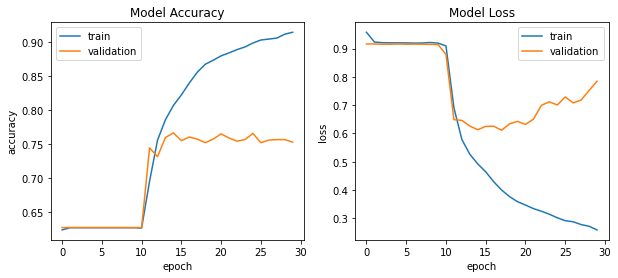

In [135]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

42/42 [==============================] - 0s 5ms/step


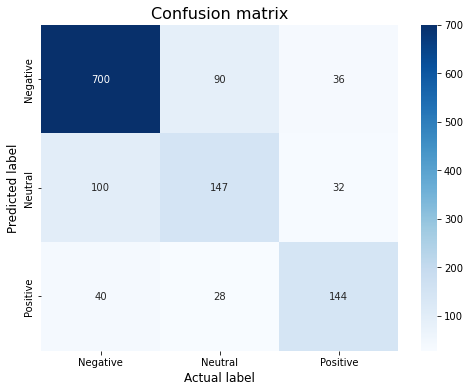

In [143]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_val_dl, y_val_dl1)

In [138]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_val_dl, y_val_dl1, verbose=1)
#f1_score = 2*(recall * precision) / (recall + precision)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

42/42 [==============================] - 0s 6ms/step - loss: 0.7847 - accuracy: 0.7525 - precision: 0.7579 - recall: 0.7487

Accuracy  : 0.7525
Precision : 0.7579
Recall    : 0.7487
F1 Score  : 0.7532
